In [1]:
# Load and clean data
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read the file
data_act = pd.read_csv('merged_data_NEW.csv',sep=',',header=0)

import numpy as np
from numpy import linalg

# Create new features

# Euclidean distance between points. 6 in total.
#data_act['EuDis_c_b'] = np.linalg.norm(data_act.iloc[:, [1,2]].values - data_act.iloc[:, [3,4]], axis=1)
data_act['EUDis_c_b'] = np.sqrt((data_act['belt_x-coordinate'] - data_act['chest_x-coordinate'])**2 + (data_act['belt_y-coordinate'] - data_act['chest_y-coordinate'])**2 + (data_act['belt_z-coordinate'] - data_act['chest_z-coordinate'])**2)
data_act['EUDis_c_ar'] = np.sqrt((data_act['ar_x-coordinate'] - data_act['chest_x-coordinate'])**2 + (data_act['ar_y-coordinate'] - data_act['chest_y-coordinate'])**2 + (data_act['ar_z-coordinate'] - data_act['chest_z-coordinate'])**2)
data_act['EUDis_c_al'] = np.sqrt((data_act['al_x-coordinate'] - data_act['chest_x-coordinate'])**2 + (data_act['al_y-coordinate'] - data_act['chest_y-coordinate'])**2 + (data_act['al_z-coordinate'] - data_act['chest_z-coordinate'])**2)
data_act['EUDis_b_ar'] = np.sqrt((data_act['belt_x-coordinate'] - data_act['ar_x-coordinate'])**2 + (data_act['belt_y-coordinate'] - data_act['ar_y-coordinate'])**2 + (data_act['belt_z-coordinate'] - data_act['ar_z-coordinate'])**2)
data_act['EUDis_b_al'] = np.sqrt((data_act['belt_x-coordinate'] - data_act['al_x-coordinate'])**2 + (data_act['belt_y-coordinate'] - data_act['al_y-coordinate'])**2 + (data_act['belt_z-coordinate'] - data_act['al_z-coordinate'])**2)
data_act['EUDis_ar_al'] = np.sqrt((data_act['ar_x-coordinate'] - data_act['al_x-coordinate'])**2 + (data_act['ar_y-coordinate'] - data_act['al_y-coordinate'])**2 + (data_act['ar_z-coordinate'] - data_act['al_z-coordinate'])**2)

# Difference i z-coordinate between chest-belt, chest-ankler, chest-anklel, belt-ankler, belt-anklel 5 in total
data_act['ZDis_c_b'] = data_act['chest_z-coordinate'] - data_act['belt_z-coordinate']
data_act['ZDis_c_ar'] = data_act['chest_z-coordinate'] - data_act['ar_z-coordinate']
data_act['ZDis_c_al'] = data_act['chest_z-coordinate'] - data_act['al_z-coordinate']
data_act['ZDis_b_ar'] = data_act['belt_z-coordinate'] - data_act['ar_z-coordinate']
data_act['ZDis_b_al'] = data_act['belt_z-coordinate'] - data_act['al_z-coordinate']

'''column_names = data_act.columns.values.tolist()
print(column_names)'''
# Drop old features
data_act = data_act.drop(columns=['chest_x-coordinate', 'chest_y-coordinate', 'chest_z-coordinate', 'belt_x-coordinate', 'belt_y-coordinate', 'belt_z-coordinate', 'ar_x-coordinate', 'ar_y-coordinate', 'ar_z-coordinate', 'al_x-coordinate', 'al_y-coordinate', 'al_z-coordinate'])

display(data_act)

#data_act.to_csv('data_homemade_features.csv', index=False)


sequence_name           timestamp                     date activity  \
0                A01  633790226051280329  27.05.2009 14:03:25:127  walking   
1                A01  633790226051820913  27.05.2009 14:03:25:183  walking   
2                A01  633790226052091205  27.05.2009 14:03:25:210  walking   
3                A01  633790226052361498  27.05.2009 14:03:25:237  walking   
4                A01  633790226052631792  27.05.2009 14:03:25:263  walking   
...              ...                 ...                      ...      ...   
164855           E05  633790146419554374  27.05.2009 11:50:41:957  walking   
164856           E05  633790146419824669  27.05.2009 11:50:41:983  walking   
164857           E05  633790146420094965  27.05.2009 11:50:42:010  walking   
164858           E05  633790146420635550  27.05.2009 11:50:42:063  walking   
164859           E05  633790146420905847  27.05.2009 11:50:42:090  walking   

        EUDis_c_b  EUDis_c_ar  EUDis_c_al  EUDis_b_ar  EUDis_b_al  \
0        0.384309    0.905206    0.874942    0.541151    0.552228   
1        0.384309    0.905206    0.885232    0.541151    0.558748   
2        0.371050    0.895315    0.889871    0.541151    0.565666   
3        0.410447    0.885833    0.894599    0.490156    0.530345   
4        0.450980    0.876774    0.884712    0.439490    0.499998   
...           ...         ...         ...         ...         ...   
164855   0.425300    1.366888    1.052737    1.019159    0.678286   
164856   0.386177    1.330823    1.020844    1.024901    0.676563   
164857   0.348222    1.296661    0.980298    1.032381    0.687919   
164858   0.348222    1.298719    0.982510    1.041563    0.704861   
164859   0.348222    1.298719    0.988823    1.041563    0.726998   

        EUDis_ar_al  ZDis_c_b  ZDis_c_ar  ZDis_c_al  ZDis_b_ar  ZDis_b_al  
0          0.318092  0.375674   0.856431   0.837070   0.480756   0.461396  
1          0.313175  0.375674   0.856431   0.850551   0.480756   0.474876  
2          0.309048  0.364550   0.845306   0.852906   0.480756   0.488357  
3          0.305742  0.403375   0.834181   0.855262   0.430806   0.451887  
4          0.358340  0.442201   0.823056   0.833123   0.380855   0.390922  
...             ...       ...        ...        ...        ...        ...  
164855     0.364457  0.352927   1.360823   1.030032   1.007896   0.677105  
164856     0.388621  0.317608   1.328126   0.993245   1.010518   0.675637  
164857     0.363770  0.282289   1.295428   0.968054   1.013139   0.685765  
164858     0.342540  0.282289   1.298050   0.978182   1.015761   0.695893  
164859     0.315577  0.282289   1.298050   0.988310   1.015761   0.706021  

[164860 rows x 15 columns]

In [2]:
# Drop activities that dont make sense
activities_to_keep = ['walking', 'sitting','lying']
data_act['activity'].unique()
data_act = data_act[data_act['activity'].isin(activities_to_keep)]
display(data_act)

sequence_name           timestamp                     date activity  \
0                A01  633790226051280329  27.05.2009 14:03:25:127  walking   
1                A01  633790226051820913  27.05.2009 14:03:25:183  walking   
2                A01  633790226052091205  27.05.2009 14:03:25:210  walking   
3                A01  633790226052361498  27.05.2009 14:03:25:237  walking   
4                A01  633790226052631792  27.05.2009 14:03:25:263  walking   
...              ...                 ...                      ...      ...   
164855           E05  633790146419554374  27.05.2009 11:50:41:957  walking   
164856           E05  633790146419824669  27.05.2009 11:50:41:983  walking   
164857           E05  633790146420094965  27.05.2009 11:50:42:010  walking   
164858           E05  633790146420635550  27.05.2009 11:50:42:063  walking   
164859           E05  633790146420905847  27.05.2009 11:50:42:090  walking   

        EUDis_c_b  EUDis_c_ar  EUDis_c_al  EUDis_b_ar  EUDis_b_al  \
0        0.384309    0.905206    0.874942    0.541151    0.552228   
1        0.384309    0.905206    0.885232    0.541151    0.558748   
2        0.371050    0.895315    0.889871    0.541151    0.565666   
3        0.410447    0.885833    0.894599    0.490156    0.530345   
4        0.450980    0.876774    0.884712    0.439490    0.499998   
...           ...         ...         ...         ...         ...   
164855   0.425300    1.366888    1.052737    1.019159    0.678286   
164856   0.386177    1.330823    1.020844    1.024901    0.676563   
164857   0.348222    1.296661    0.980298    1.032381    0.687919   
164858   0.348222    1.298719    0.982510    1.041563    0.704861   
164859   0.348222    1.298719    0.988823    1.041563    0.726998   

        EUDis_ar_al  ZDis_c_b  ZDis_c_ar  ZDis_c_al  ZDis_b_ar  ZDis_b_al  
0          0.318092  0.375674   0.856431   0.837070   0.480756   0.461396  
1          0.313175  0.375674   0.856431   0.850551   0.480756   0.474876  
2          0.309048  0.364550   0.845306   0.852906   0.480756   0.488357  
3          0.305742  0.403375   0.834181   0.855262   0.430806   0.451887  
4          0.358340  0.442201   0.823056   0.833123   0.380855   0.390922  
...             ...       ...        ...        ...        ...        ...  
164855     0.364457  0.352927   1.360823   1.030032   1.007896   0.677105  
164856     0.388621  0.317608   1.328126   0.993245   1.010518   0.675637  
164857     0.363770  0.282289   1.295428   0.968054   1.013139   0.685765  
164858     0.342540  0.282289   1.298050   0.978182   1.015761   0.695893  
164859     0.315577  0.282289   1.298050   0.988310   1.015761   0.706021  

[114434 rows x 15 columns]

In [3]:
# We split the data using whole groups of sequences (A01+A02+---A05, B01+....+B05 etc).
# The next two lines were used to single out a sequence
import random
random.seed(55)
print(random.randint(1, 5))
# The number one correlates with the letter A.
data_act['sequence_name'].unique()


1


array(['A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'B02', 'B03', 'B04',
       'B05', 'C01', 'C02', 'C03', 'C04', 'C05', 'D01', 'D02', 'D03',
       'D04', 'D05', 'E01', 'E02', 'E03', 'E04', 'E05'], dtype=object)

In [4]:
# Split into training and test set

from sklearn.model_selection import train_test_split
import numpy as np
import random

# We split our data based on the results from the cell above. All A01-A05 sequences are selected. 
# Roughly 20% of our data.
train_data_act = data_act[data_act['sequence_name'].isin(['B01', 'B02', 'B03', 'B04',
       'B05', 'C01', 'C02', 'C03', 'C04', 'C05', 'D01', 'D02', 'D03',
       'D04', 'D05', 'E01', 'E02', 'E03', 'E04', 'E05'])]
test_data_act = data_act[data_act['sequence_name'].isin(['A01', 'A02', 'A03', 'A04', 'A05'])]




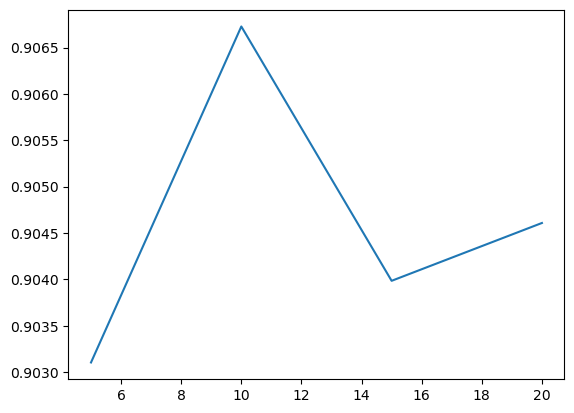

 Best K is:  10  has value:  0.9067269226781116


In [5]:
# Selecting parameters using cross validation
# Each function takes training, traines and testes and presents the accuracy. If we can feed it 
# If it can take the whole training set AND the sequences that should be used for test that would be great.
# It should return a print.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)[source]


#Vi vill att den skapar en dataframe for en viss split och sedan använder denna för att göra beräkningar.
# Vi vill ha en funktion som testar en massa k-värden för en split och returnerar en lista. 
# Kanske en funktion som tar en X och en y och returnerar en prediction.

def fold_creator(training_data_frame, test_sequence):
    '''Takes a data_frame and a sequence (B01, B02 etc) and return a list with X and y for train and test.
    index position 0=X_train, 1=y_train, 2=X_test, 3=y_test in the returned list'''
   
    train_data_act = training_data_frame[training_data_frame['sequence_name'].isin(test_sequence)]
    test_data_act = training_data_frame[~training_data_frame.sequence_name.str.contains('|'.join(test_sequence))]
    
    y_train = train_data_act['activity'] 
    X_train = train_data_act

    y_test = test_data_act['activity'] 
    X_test = test_data_act


    # Drop unnecessary data for X
    column_list = ['sequence_name', 'timestamp', 'date', 'activity']
    for element in column_list:
        X_train = X_train.drop(element, axis=1)
        X_test = X_test.drop(element, axis=1)
    
    
    
    list_w_X_and_y = [X_train, y_train, X_test, y_test]
    return list_w_X_and_y
    

def accuracy_finder(list_w_X_and_y, k_value_list):
    '''Takes an X_train and a y_train and a y_test and a list of k_values and returns an array w their accuracies'''
    list_of_accuracies = []
    
    for k_value in k_value_list:
        # Traines a knn model
        knn = KNeighborsClassifier(n_neighbors=k_value)
        knn.fit(list_w_X_and_y[0], list_w_X_and_y[1])

        # Return accuracy
        predictions_generalization = knn.predict(list_w_X_and_y[2])


        list_of_accuracies.append(accuracy_score(list_w_X_and_y[3], predictions_generalization))
    return np.array(list_of_accuracies)

def accuracy_ploter_master(data_frame, k_value_list):
    '''Master function that creates lists of accuracies, weighs them together and plots them. '''
     # We start by creating our for folds and puting them in a list
    fold_list = []
    fold_list.append( fold_creator(data_frame, ['B01', 'B02', 'B03', 'B04', 'B05']) )
    fold_list.append(fold_creator(data_frame, ['C01', 'C02', 'C03', 'C04', 'C05']))
    fold_list.append(fold_creator(data_frame, ['D01', 'D02', 'D03', 'D04', 'D05']))
    fold_list.append(fold_creator(data_frame, ['E01', 'E02', 'E03', 'E04', 'E05']))
    # We then calculate all accuracies and create a list that holds all accuracy arrays
    list_w_accuracies = []
    for fold in fold_list:
        list_w_accuracies.append(accuracy_finder(fold, k_value_list))
    
    # The next step is to add all accuracies together
    weighed_together_accuracies = (list_w_accuracies[0] + list_w_accuracies[1] + list_w_accuracies[2] + list_w_accuracies[3]) / 4
    list_of_weighed_values = weighed_together_accuracies.tolist()
    max_value = max(list_of_weighed_values)
    plt.plot(k_value_list, list_of_weighed_values)
    
    plt.show()
    print(' Best K is: ', k_value_list[list_of_weighed_values.index(max_value)], ' has value: ', max_value)
    

#k_values_to_test = np.arange(150, 250, 100).tolist()
k_values_to_test = np.array([5, 10, 15, 20])

accuracy_ploter_master(train_data_act, k_values_to_test)


In [6]:
# Fit model
from sklearn.neighbors import KNeighborsClassifier

y_train = train_data_act['activity'] 
X_train = train_data_act # Note that this still contains activity and such is really the whole train data frame, not just the X part

y_test = test_data_act['activity'] 
X_test = test_data_act # Note that this still contains activity and such is really the whole test data frame, not just the X part


# We drop unwanted columns from X
column_list = ['sequence_name','timestamp', 'date', 'activity']
for element in column_list:
    X_train = X_train.drop(element, axis=1)
    X_test = X_test.drop(element, axis=1) # This is where we drop the labels (activity)


knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

              precision    recall  f1-score   support

       lying       0.99      0.97      0.98     10597
     sitting       0.85      0.88      0.86      5051
     walking       0.86      0.86      0.86      3645

    accuracy                           0.92     19293
   macro avg       0.90      0.90      0.90     19293
weighted avg       0.93      0.92      0.92     19293



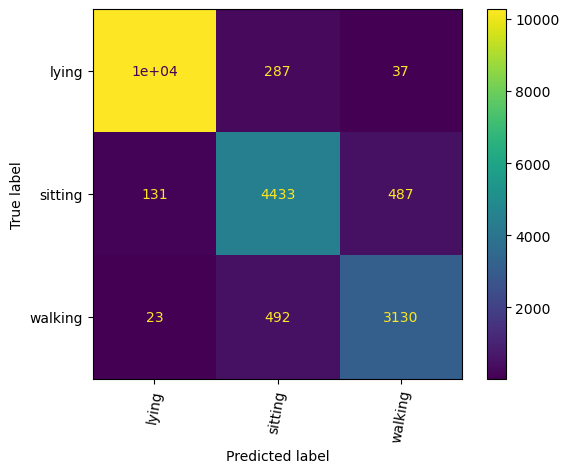

In [7]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings

# Evluation
predictions = knn.predict(X_test) # This is where we calculate our prediction


confusion = confusion_matrix(y_test, predictions, labels=knn.classes_)
print(classification_report(y_test, knn.predict(X_test)))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=knn.classes_)
disp.plot()
plt.xticks(rotation=80)
plt.show()
